<a href="https://colab.research.google.com/github/cfreeman22/AllLifeBankCustomer_Segmentation/blob/main/AllLifeBankCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All Life Bank Customer Segmentation
Presented By Christian Freeman March 2022

# Project Planning
## Context
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

 

## Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

 

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import wrangle
from scipy.stats import zscore

#import sklearn.metrics

In [2]:
raw = pd.read_excel('Credit+Card+Customer+Data.xlsx')

In [3]:
raw.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
raw.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
raw.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [6]:
df =raw.copy()

In [7]:
raw.Sl_No.nunique()

660

In [8]:
raw['Avg_Credit_Limit'].nunique()

110

In [9]:
raw['Customer Key'].nunique()

655

In [10]:
raw['Customer Key'].value_counts()

97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer Key, Length: 655, dtype: int64

In [11]:
raw[raw['Customer Key'] == 97935]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [12]:
raw[raw['Customer Key'] == 50706]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


In [13]:
raw[raw['Customer Key'] == 47437]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


In [14]:
raw[raw['Customer Key'] == 37252]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


In [15]:
raw[raw['Customer Key'] == 96929]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


In [16]:
raw[raw['Customer Key'].duplicated()].count()

Sl_No                  5
Customer Key           5
Avg_Credit_Limit       5
Total_Credit_Cards     5
Total_visits_bank      5
Total_visits_online    5
Total_calls_made       5
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [18]:
# Checking for duplicates
df[df.duplicated()].count()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [19]:
# Checking for nulls
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [20]:
# Descriptives Statistics
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [21]:
# Value counts of all variables
for column in df.columns.to_list():
    print(df[column].value_counts())
    print('===================================')
    print()

1      1
435    1
437    1
438    1
439    1
      ..
221    1
222    1
223    1
224    1
660    1
Name: Sl_No, Length: 660, dtype: int64

97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer Key, Length: 655, dtype: int64

8000      35
6000      31
9000      28
13000     28
19000     26
          ..
43000      1
146000     1
155000     1
200000     1
167000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

2    158
1    112
0    100
3    100
5     98
4     92
Name: Total_visits_bank, dtype: int64

2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
10      6
12      6
8       6
11      5
13      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

4     108
0      97
2      91
1      90
3      83
6      39
7    

## Observations
- The dataframe contains 660 rows and 7 columns
- There are no duplicated values
- Avg_Credit_Limit is skewed  with a mean of 34574.242424 , a min of 3000.0 , and a max of 200000 
- Total_Credit_Cards has a mean of 5 , a min of 1, and a max of 10 
- Total_visits_bank	has a mean of 2.5 , a min of 0 , and a max of 5
- Total_calls_made	has a mean of 3.5 , a min of 0 , and a max of 10
- There is no missing values
- There is no duplicate observations


### Action plan

# Exploratory Data Analysis
- Creating variables for categorical and numerical to help with exploring

In [22]:
cat_var = [ 'Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

quant_var = ['Avg_Credit_Limit']

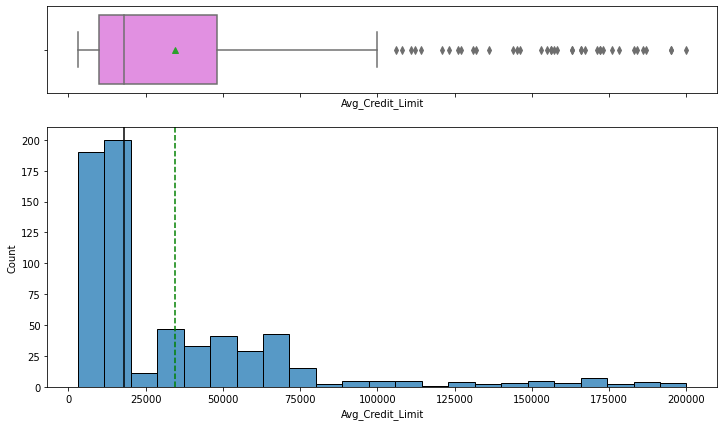

In [23]:
for x in quant_var:
    wrangle.histogram_boxplot(df, x) #Analysing numeric variables using our predefined module stored in the wrangle file

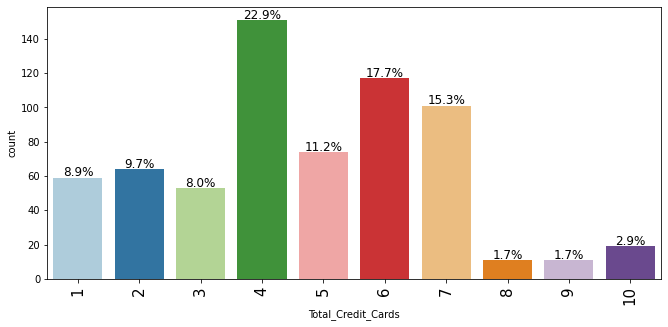

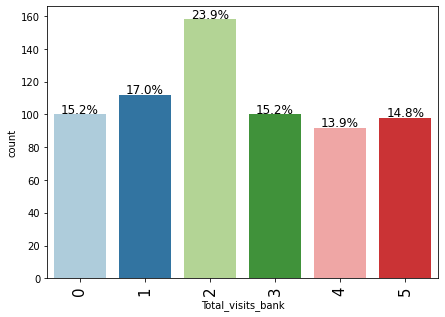

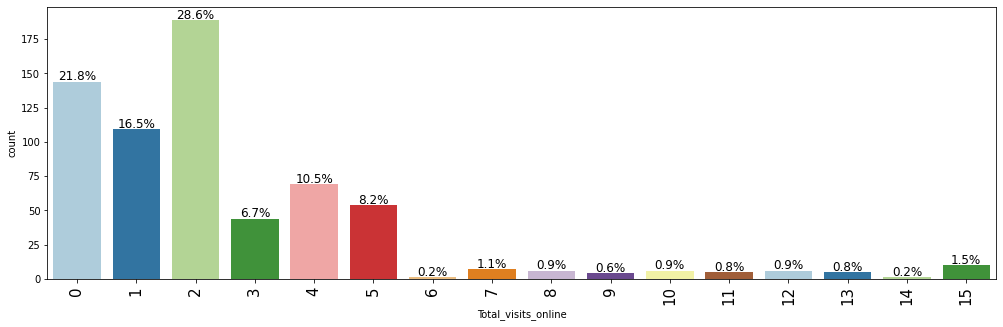

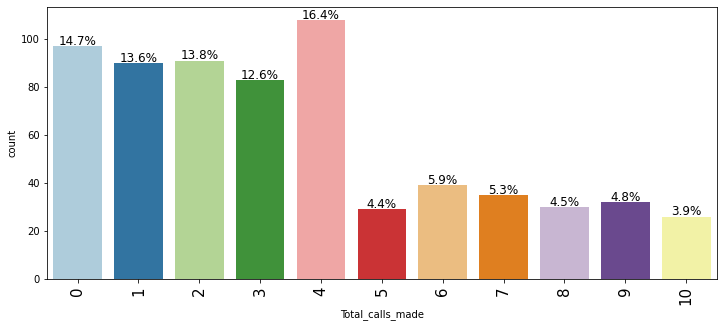

In [24]:
for x in cat_var:
    wrangle.labeled_barplot(df, x, perc=True) #Analysing categorical variables using our predefined module stored in the wrangle file

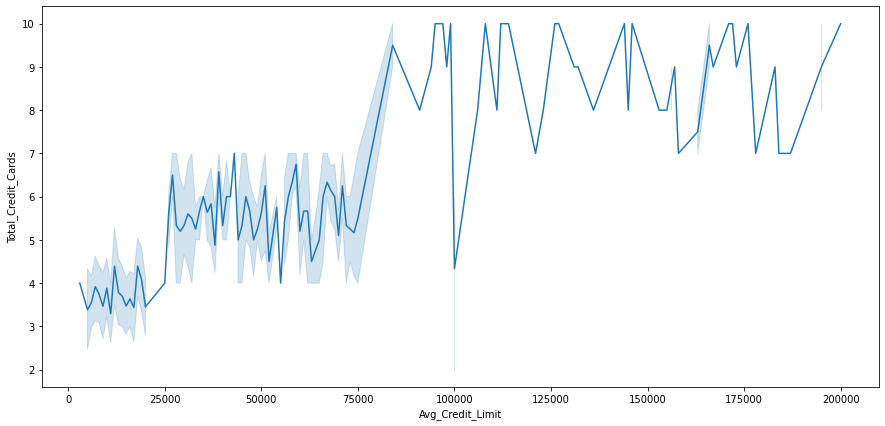

In [25]:
plt.figure(figsize=(15,7))
sns.lineplot(df["Avg_Credit_Limit"],df["Total_Credit_Cards"],palette='winter')
 
plt.show()

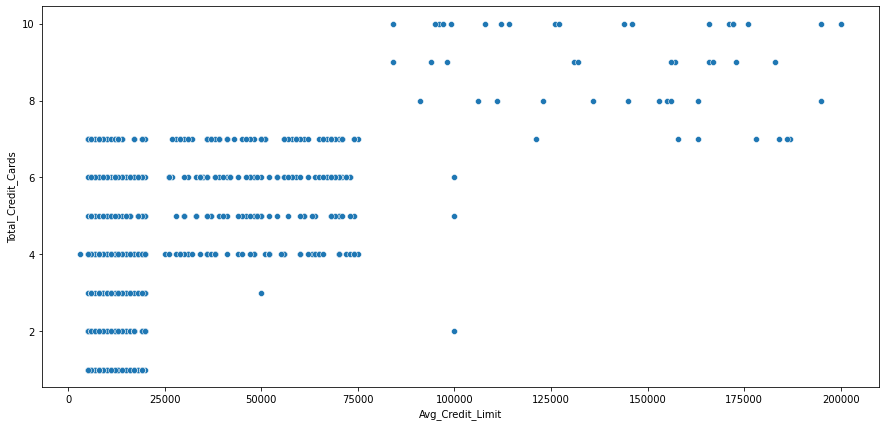

In [26]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Credit_Limit"],df["Total_Credit_Cards"],ci=0.,palette="Dark2")
 
plt.show()

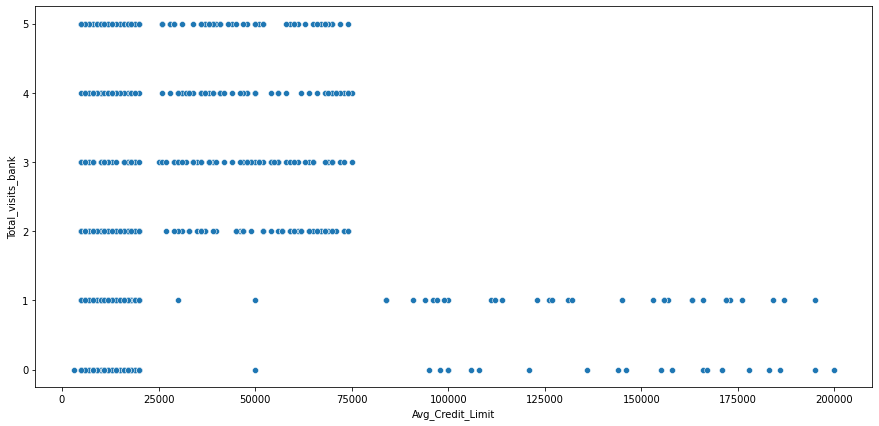

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Credit_Limit"],df["Total_visits_bank"],ci=0.,palette="Dark2")
 
plt.show()

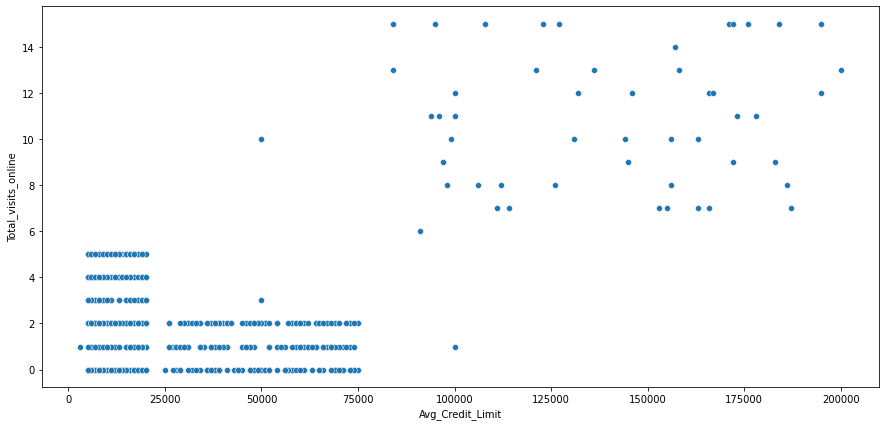

In [28]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Credit_Limit"],df["Total_visits_online"],ci=0.,palette="Dark2")
plt.show()

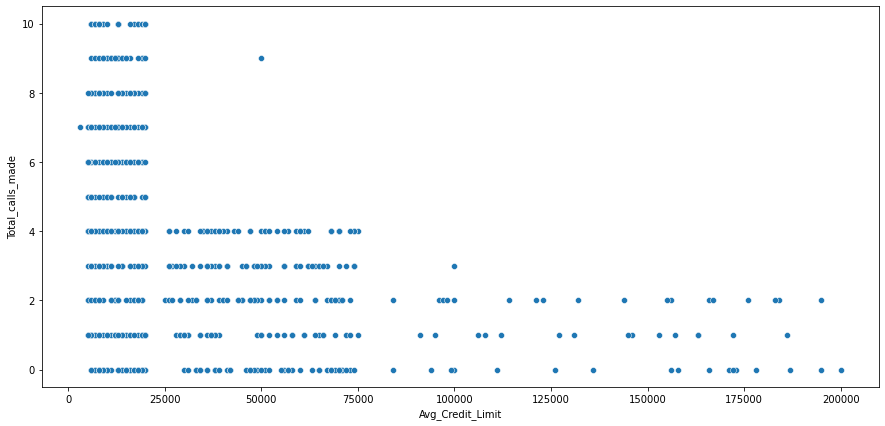

In [29]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["Avg_Credit_Limit"],df["Total_calls_made"],ci=0.,palette="Dark2")
plt.show()

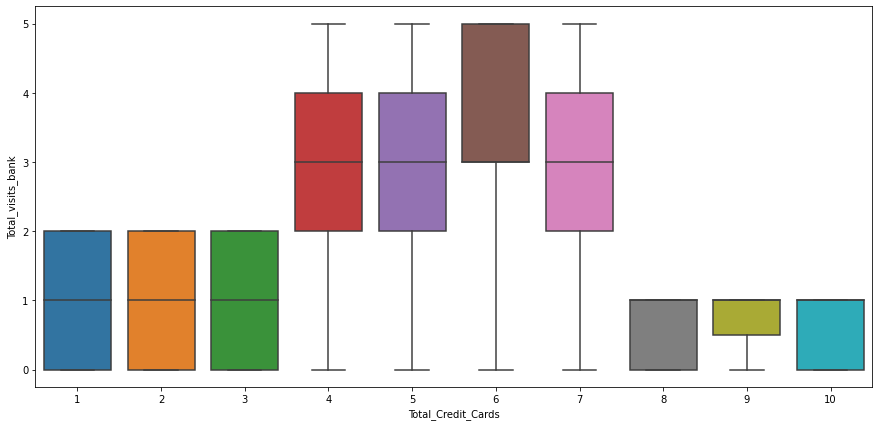

In [30]:

plt.figure(figsize=(15,7))
sns.boxplot(df["Total_Credit_Cards"],df["Total_visits_bank"])
  
plt.show()

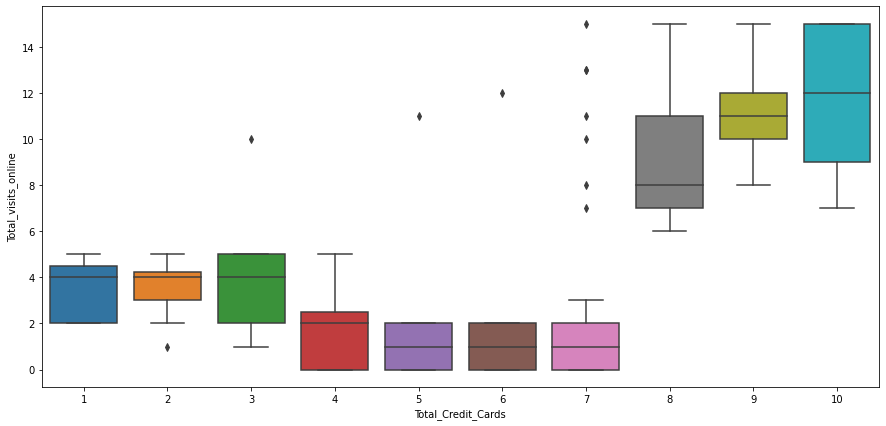

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_Credit_Cards"],df["Total_visits_online"])
plt.show()

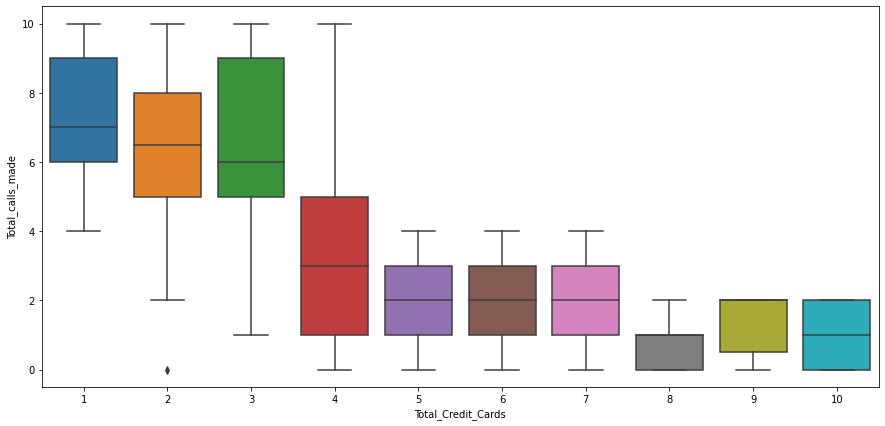

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_Credit_Cards"],df["Total_calls_made"])
 
plt.show()

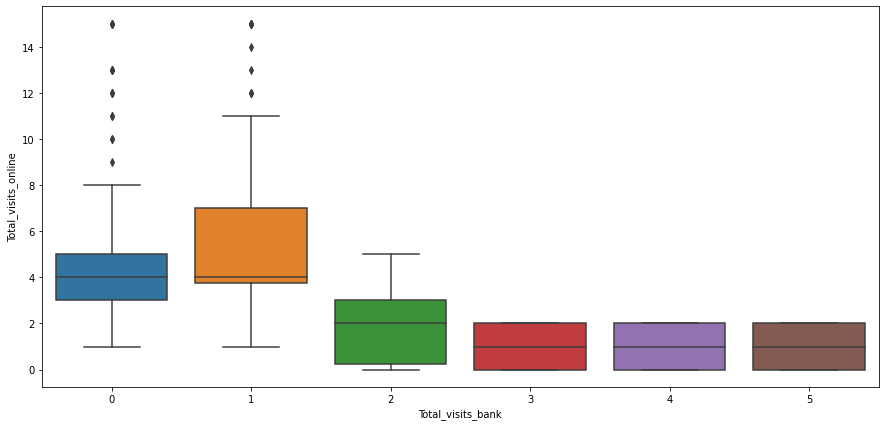

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_visits_bank"],df["Total_visits_online"])
plt.show()

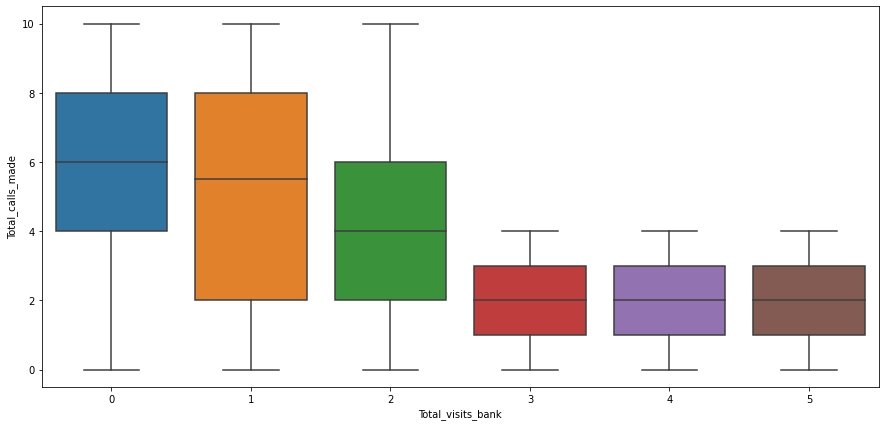

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_visits_bank"],df["Total_calls_made"])
 
plt.show()

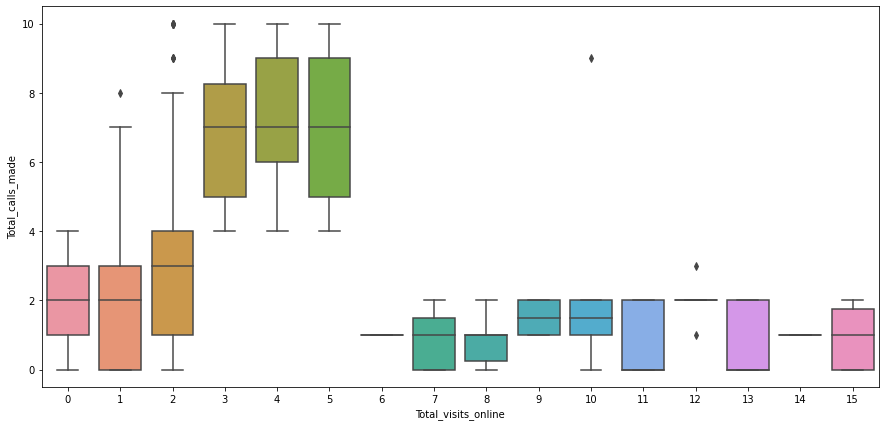

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(df["Total_visits_online"],df["Total_calls_made"])
plt.show()

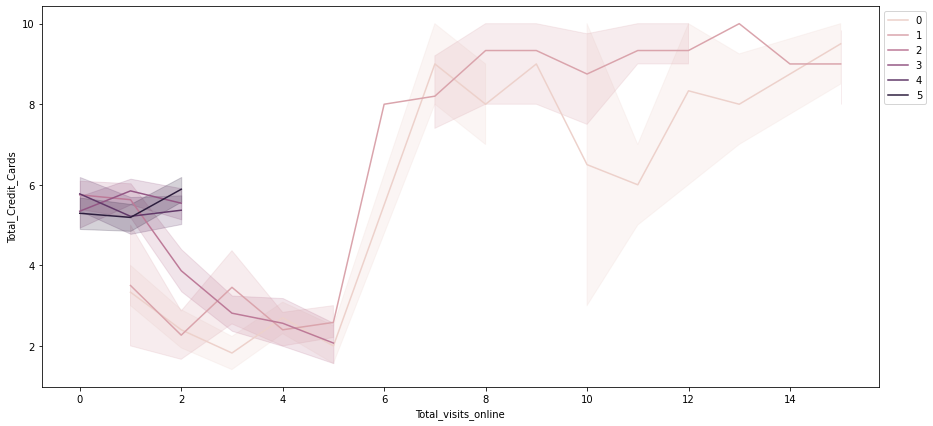

In [36]:
plt.figure(figsize=(15,7))
sns.lineplot(df["Total_visits_online"],df["Total_Credit_Cards"],hue=df["Total_visits_bank"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

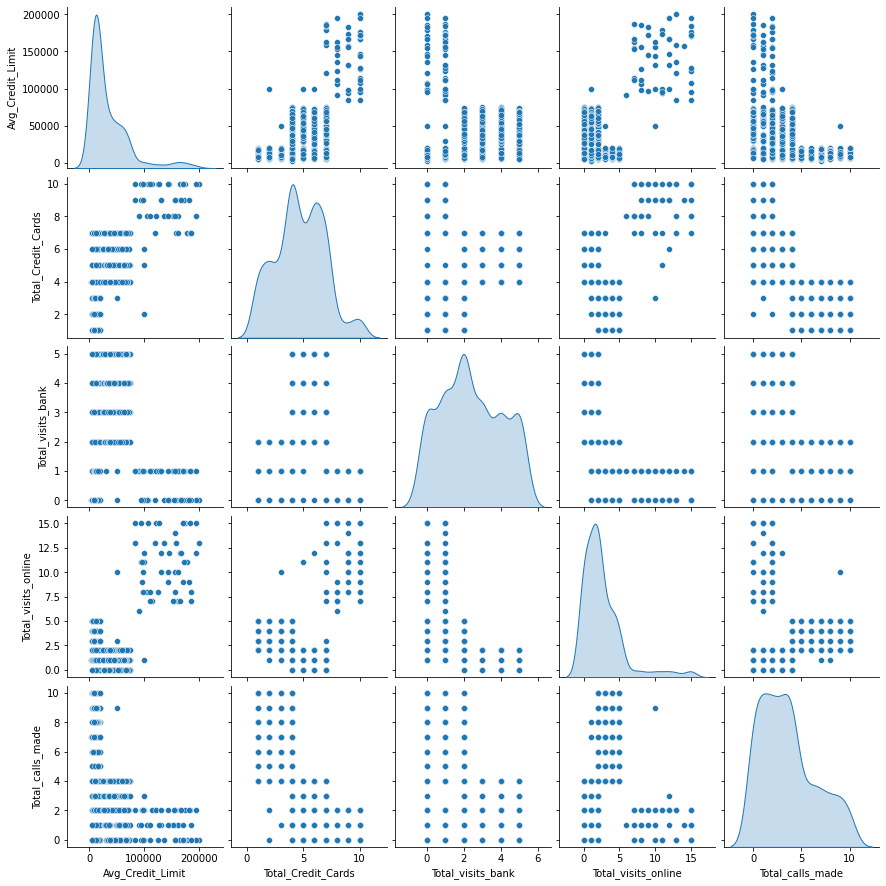

In [37]:
sns.pairplot(data=df.drop(["Sl_No","Customer Key"],axis=1), diag_kind="kde")
plt.show()

# Data preprocessing

In [38]:
df['avg_credit_lim_per_card'] = df.Avg_Credit_Limit / df.Total_Credit_Cards

In [39]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,avg_credit_lim_per_card
0,1,87073,100000,2,1,1,0,50000.000000
1,2,38414,50000,3,0,10,9,16666.666667
2,3,17341,50000,7,1,3,4,7142.857143
3,4,40496,30000,5,1,1,4,6000.000000
4,5,47437,100000,6,0,12,3,16666.666667


# Applying K-means Clustering

# Applying Hierarchical Clustering


# K-means vs Hierarchical Clustering

# Actionable Insights & Recommendations